In [1]:
import numpy as np
import pandas as pd

# 假设有四个指标的数据，存储在 DataFrame 中
data = {
    'tps': [100, 150, 120, 130],
    'error_rate': [10, 15, 8, 12],
    'delay': [5, 8, 6, 7],
    'write_rate': [200, 180, 210, 190]
}

df = pd.DataFrame(data)

# 数据归一化
df_normalized = (df - df.min()) / (df.max() - df.min())

# 计算信息熵
entropy = (-1) * (1 / np.log(len(df))) * ((df_normalized * np.log(df_normalized)).sum())

# 计算权重
weight = (1 - entropy) / sum(1 - entropy)

print("Entropy:", entropy)
print("Weight:", weight)

Entropy: tps           0.485475
error_rate    0.488866
delay         0.459148
write_rate    0.459148
dtype: float64
Weight: tps           0.244156
error_rate    0.242547
delay         0.256649
write_rate    0.256649
dtype: float64


F:\Tools\Anaconda3\envs\Auto-Tuning-HLF\lib\site-packages\pandas\core\internals\blocks.py:329: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


In [108]:
from Model import initialize

configParameters = initialize.read_yaml_config('../Benchmark-Deploy-Tool/config.yaml')
mysql_connection, engine = initialize.mysql_connect(configParameters['Database']['Mysql']['Host'],
                                                        configParameters['Database']['Mysql']['Port'],
                                                        configParameters['Database']['Mysql']['User'],
                                                        configParameters['Database']['Mysql']['Password'],
                                                        configParameters['Database']['Mysql']['Database'])

In [109]:

def plot_combined_graph(dataframe):
    fig, ax = plt.subplots(figsize=(8, 6))  # 创建一个图

    # 绘制第一个散点图，纵坐标为 throughput，横坐标为 disc_write
    ax.scatter(dataframe['disc_write'], dataframe['throughput'], label='Disc Write')

    # 绘制第二个散点图，纵坐标为 throughput，横坐标为 avg_latency
    ax.scatter(dataframe['avg_latency'], dataframe['throughput'], label='Avg Latency')

    ax.set_xlabel('Disc Write / Avg Latency')
    ax.set_ylabel('Throughput')
    ax.set_title('Throughput vs Disc Write / Avg Latency')

    ax.legend()
    plt.show()

In [110]:
from matplotlib import pyplot as plt


def plot_three_graphs(dataframe):
    fig, axes = plt.subplots(1, 3, figsize=(20, 5))  # 创建三个子图

    # 遍历每个子图
    for i, feature in enumerate(['disc_write', 'avg_latency', 'error_rate']):
        # dataframe = dataframe.sort_values(by=[feature, 'throughput'], ascending=[True, True])
        # dataframe = dataframe.sort_values(by=['throughput'], ascending=[True])
        axes[i].scatter(dataframe[feature], dataframe['throughput'], s=3)  # 调整散点大小
        axes[i].set_xlabel(feature.capitalize())  # 将特征名首字母大写
        axes[i].set_ylabel('Throughput')
        axes[i].set_title(f'Throughput vs {feature.capitalize()}')

    plt.tight_layout()  # 调整布局，防止重叠
    plt.show()

In [111]:
def plot_three_graphs_distribution(dataframe):
    fig, axes = plt.subplots(1, 4, figsize=(15, 5))  # 创建三个子图

    # 设置三个经典颜色
    colors = ['blue', 'orange', 'green', 'red']

    # 遍历每个子图
    for i, feature in enumerate(['disc_write', 'avg_latency', 'error_rate', 'throughput']):
        axes[i].hist(dataframe[feature], bins=20, alpha=0.7, color=colors[i], edgecolor = 'k')  # 使用不同颜色绘制柱状图
        axes[i].set_xlabel(feature.capitalize())  # 将特征名首字母大写
        axes[i].set_ylabel('Frequency')

    plt.tight_layout()  # 调整布局，防止重叠
    plt.show()

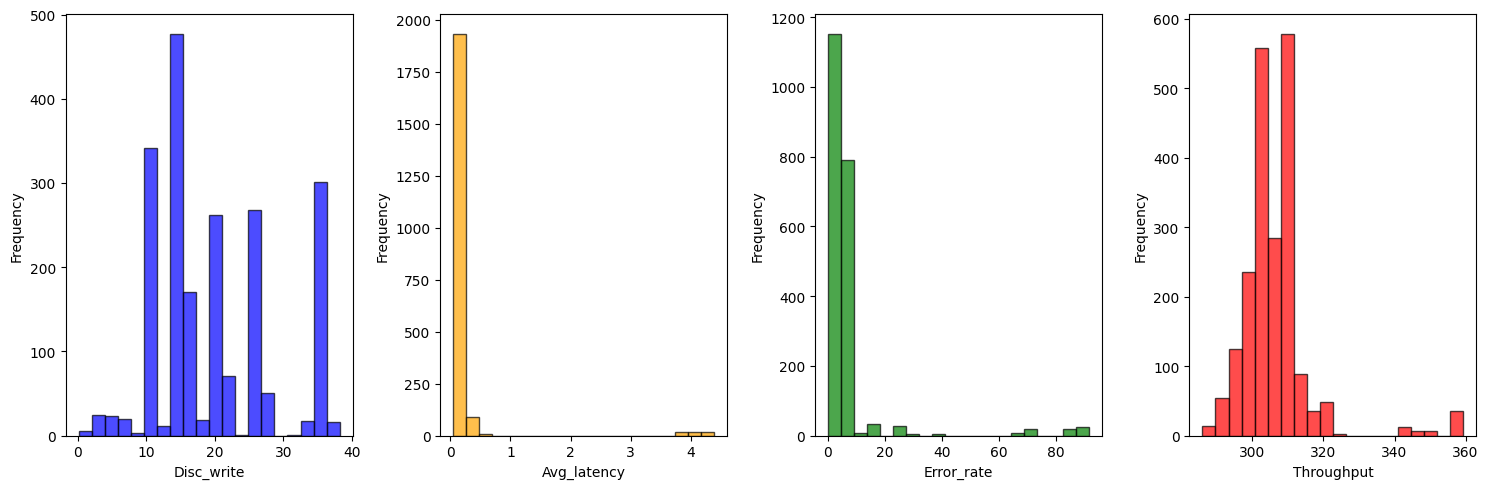

In [112]:
df = pd.read_sql('dataset', con=engine)
filtered_df = df[~df['bench_config'].isin(['query', 'open'])]
# filtered_df = filtered_df.sort_values(by=['avg_latency', 'throughput'], ascending=[True, True])
# filtered_df = filtered_df.sort_values(by='throughput')  # 按照 throughput 排序数据

plot_three_graphs_distribution(filtered_df)

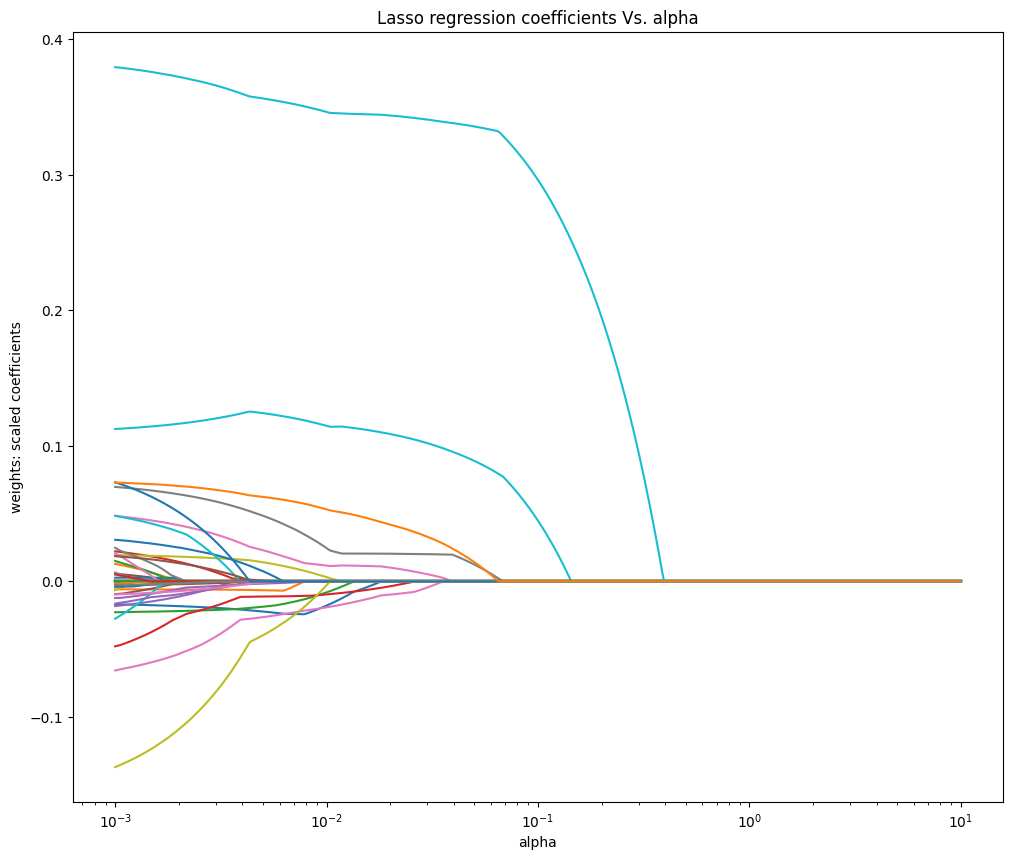

broadcast_validate_duration                  0.346450
Orderer_BatchSize_PreferredMaxBytes          0.114835
broadcast_enqueue_duration                   0.053208
Orderer_BatchSize_MaxMessageCount            0.024592
peer_gossip_dialTimeout                      0.019111
Orderer_General_Authentication_TimeWindow    0.017840
Orderer_BatchTimeout                         0.011692
peer_gossip_aliveTimeInterval                0.009574
Orderer_General_Keepalive_ServerInterval     0.008080
Orderer_BatchSize_AbsoluteMaxBytes           0.003140
gossip_state_commit_duration                 0.002803
dtype: float64


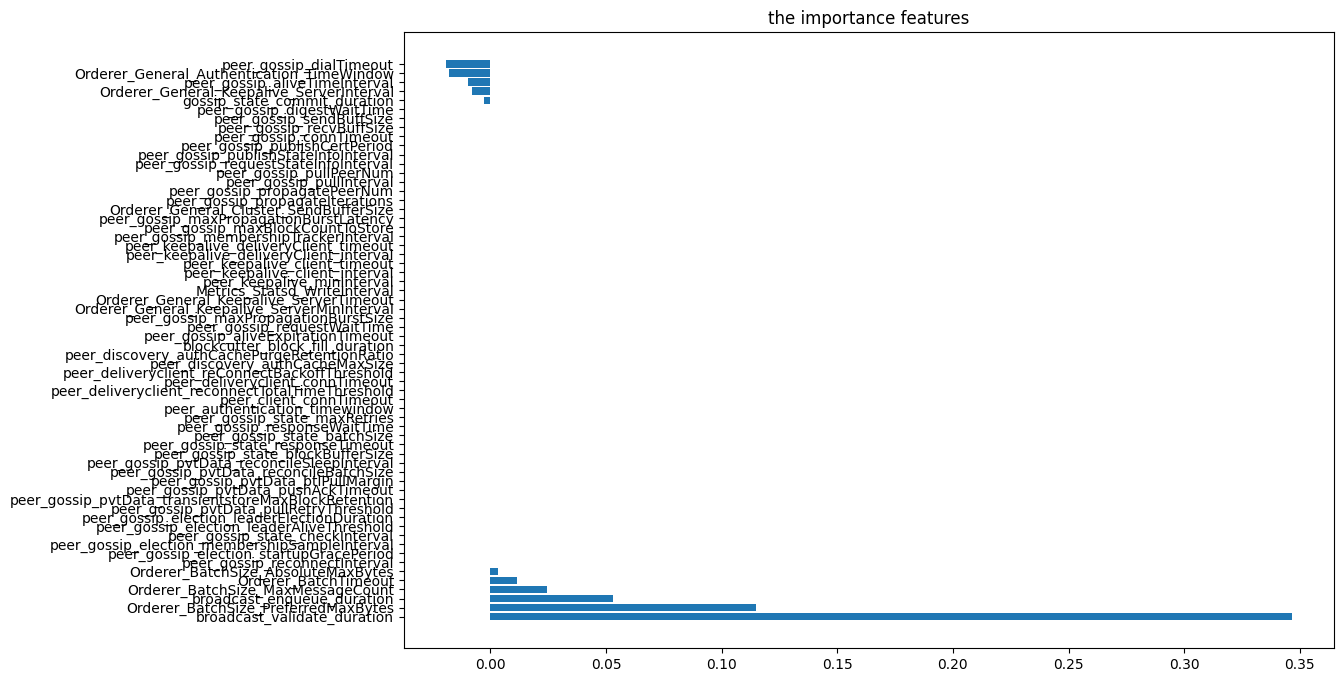

In [113]:
from Model.performance_analyze import get_dataset_lasso

get_dataset_lasso(engine)

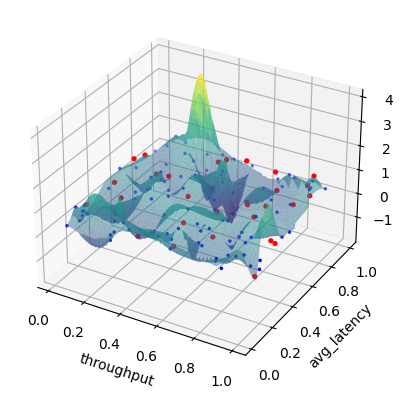

In [24]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from scipy.interpolate import griddata

# 假设fitness_和archive_fitness是你的数据

# 生成随机数据作为示例
fitness_ = np.random.rand(100, 3)
archive_fitness = np.random.rand(30, 3)

# 创建3D图
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 绘制点
ax.scatter(fitness_[:, 0], fitness_[:, 1], fitness_[:, 2], s=10, c='blue', marker=".")
ax.scatter(archive_fitness[:, 0], archive_fitness[:, 1], archive_fitness[:, 2], s=30, c='red', marker=".", alpha=1.0)

# 设置坐标轴标签
ax.set_xlabel('throughput')
ax.set_ylabel('avg_latency')
ax.set_zlabel('disc_write')

# 对fitness_进行插值并绘制曲面
x = fitness_[:, 0]
y = fitness_[:, 1]
z = fitness_[:, 2]

xi = np.linspace(min(x), max(x), 100)
yi = np.linspace(min(y), max(y), 100)
xi, yi = np.meshgrid(xi, yi)

zi = griddata((x, y), z, (xi, yi), method='cubic')  # 使用cubic插值方法进行插值

# 绘制曲面
ax.plot_surface(xi, yi, zi, cmap='viridis', alpha=0.5)  # 以较低的alpha值绘制曲面，以便看到散点

plt.show()


21.857999999999997
22.177000000000003
26.334000000000003
24.545000000000005
13.834


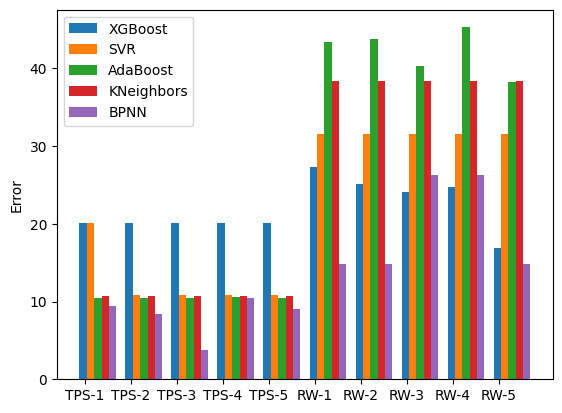

In [53]:
import matplotlib.pyplot as plt
import numpy as np

list1 = np.array([20.06, 20.06, 20.06, 20.06, 20.06, 27.34, 25.14, 24.10, 24.76, 16.94])
list2 = np.array([20.16, 10.89, 10.89, 10.89, 10.89, 31.61, 31.61, 31.61, 31.61, 31.61])
list3 = np.array([10.41, 10.44, 10.40, 10.55, 10.41, 43.43, 43.82, 40.33, 45.30, 38.25])
list4 = np.array([10.67, 10.67, 10.67, 10.67, 10.67, 38.42, 38.42, 38.42, 38.42, 38.42])
list5 = np.array([9.48, 8.38, 3.78, 10.46, 9.02, 14.84, 14.84, 26.35, 26.35, 14.84])
print(list1.mean())
print(list2.mean())
print(list3.mean())
print(list4.mean())
print(list5.mean())
length = len(list1)
x = np.arange(length)
listCol = ['TPS-1', 'TPS-2', 'TPS-3', 'TPS-4', 'TPS-5', 'RW-1', 'RW-2', 'RW-3', 'RW-4', 'RW-5']
plt.figure()
total_width, n = 0.8, 5
width = total_width / n
x1 = x - width / n
x2 = x1 + width
x3 = x2 + width
x4 = x3 + width
x5 = x4 + width
plt.ylabel('Error')
plt.bar(x1, list1, width, label='XGBoost')
plt.bar(x2, list2, width, label='SVR')
plt.bar(x3, list3, width, label='AdaBoost')
plt.bar(x4, list4, width, label='KNeighbors')
plt.bar(x5, list5, width, label='BPNN')
plt.xticks(x, listCol)
plt.legend(ncol=1)
plt.show()


2292.9
2308.85
2516.7
2927.25
1891.7


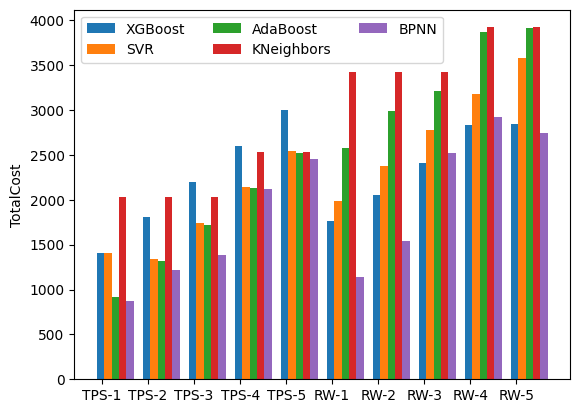

In [55]:
import matplotlib.pyplot as plt
import numpy as np

# list1 = np.array([903.01, 1703.01, 2503.01, 3303.01, 4103.01, 6304.94, 7104.94, 7904.94, 8704.94, 9504.94])
# list2 = np.array([508.08, 1294.94, 1694.94, 2094.94, 2494.94, 1762.34, 2380.72, 3180.72, 3580.72, 3980.72])
# list3 = np.array([870.86, 1672.20, 2470.35, 3277.75, 4070.81, 2971.74, 3791.05, 4416.74, 5465.05, 5912.88])
# list4 = np.array([3083.90, 3083.90, 3083.90, 4083.90, 4083.90, 4921.45, 4921.45, 4921.45, 5921.45, 5921.45])
# list5 = np.array([1274.05, 2019.18, 2589.31, 3723.06, 4451.14, 3142.26, 1542.26, 2117.93, 1717.93, 3942.26])

list1_tc = []
list2_tc = []
list3_tc = []
list4_tc = []
list5_tc = []
for idx in range(0, 10, 1):
    if idx % 5 == 0:
        list1_tc.append(list1[idx]*50 + 400)
        list2_tc.append(list2[idx]*50 + 400)
        list3_tc.append(list3[idx]*50 + 400)
        list5_tc.append(list5[idx]*50 + 400)
    elif idx % 5 == 1:
        list1_tc.append(list1[idx]*50 + 800)
        list2_tc.append(list2[idx]*50 + 800)
        list3_tc.append(list3[idx]*50 + 800)
        list5_tc.append(list5[idx]*50 + 800)
    elif idx % 5 == 2:
        list1_tc.append(list1[idx]*50 + 1200)
        list2_tc.append(list2[idx]*50 + 1200)
        list3_tc.append(list3[idx]*50 + 1200)
        list5_tc.append(list5[idx]*50 + 1200)
    elif idx % 5 == 3:
        list1_tc.append(list1[idx]*50 + 1600)
        list2_tc.append(list2[idx]*50 + 1600)
        list3_tc.append(list3[idx]*50 + 1600)
        list5_tc.append(list5[idx]*50 + 1600)
    elif idx % 5 == 4:
        list1_tc.append(list1[idx]*50 + 2000)
        list2_tc.append(list2[idx]*50 + 2000)
        list3_tc.append(list3[idx]*50 + 2000)
        list5_tc.append(list5[idx]*50 + 2000)
for idx in range(0, 10, 1):
    if idx % 5 == 0 or idx % 5 == 1 or idx % 5 == 2:
        list4_tc.append(list4[idx]*50 + 1500)
    elif idx % 5 == 3 or idx % 5 == 4:
        list4_tc.append(list4[idx]*50 + 2000)
list1_tc = np.array(list1_tc)
print(list1_tc.mean())
list2_tc = np.array(list2_tc)
print(list2_tc.mean())
list3_tc = np.array(list3_tc)
print(list3_tc.mean())
list4_tc = np.array(list4_tc)
print(list4_tc.mean())
list5_tc = np.array(list5_tc)
print(list5_tc.mean())
length = len(list1)
x = np.arange(length)
listCol = ['TPS-1', 'TPS-2', 'TPS-3', 'TPS-4', 'TPS-5', 'RW-1', 'RW-2', 'RW-3', 'RW-4', 'RW-5']
plt.figure()
total_width, n = 0.8, 5
width = total_width / n
x1 = x - width / n
x2 = x1 + width
x3 = x2 + width
x4 = x3 + width
x5 = x4 + width
plt.ylabel('TotalCost')
plt.bar(x1, list1_tc, width, label='XGBoost')
plt.bar(x2, list2_tc, width, label='SVR')
plt.bar(x3, list3_tc, width, label='AdaBoost')
plt.bar(x4, list4_tc, width, label='KNeighbors')
plt.bar(x5, list5_tc, width, label='BPNN')
plt.xticks(x, listCol)
plt.legend(ncol=3)
plt.show()


In [ ]:
# +--------+--------+------+-----------------+-----------------+-----------------+-----------------+------------------+
# | Name   | Succ   | Fail | Send Rate (TPS) | Max Latency (s) | Min Latency (s) | Avg Latency (s) | Throughput (TPS) |
# |--------|--------|------|-----------------|-----------------|-----------------|-----------------|------------------|
# | create | 36367  | 0    | 303.1           | 2.06            | 0.02            | 0.08            | 298.1            |
# |--------|--------|------|-----------------|-----------------|-----------------|-----------------|------------------|
# | modify | 32117  | 2298 | 286.8           | 2.08            | 0.02            | 0.11            | 282.1            |
# |--------|--------|------|-----------------|-----------------|-----------------|-----------------|------------------|
# | query  | 223869 | 0    | 1865.6          | 0.55            | 0.00            | 0.05            | 1865.5           |
# +--------+--------+------+-----------------+-----------------+-----------------+-----------------+------------------+

In [ ]:
# +----------+--------+------+-----------------+-----------------+-----------------+-----------------+------------------+
# | Name     | Succ   | Fail | Send Rate (TPS) | Max Latency (s) | Min Latency (s) | Avg Latency (s) | Throughput (TPS) |
# |----------|--------|------|-----------------|-----------------|-----------------|-----------------|------------------|
# | open     | 35221  | 1239 | 303.9           | 2.06            | 0.02            | 0.06            | 298.8            |
# |----------|--------|------|-----------------|-----------------|-----------------|-----------------|------------------|
# | query    | 219192 | 0    | 1826.6          | 0.63            | 0.00            | 0.05            | 1826.6           |
# |----------|--------|------|-----------------|-----------------|-----------------|-----------------|------------------|
# | transfer | 31971  | 2564 | 287.8           | 2.11            | 0.02            | 0.09            | 283.0            |
# +----------+--------+------+-----------------+-----------------+-----------------+-----------------+------------------+

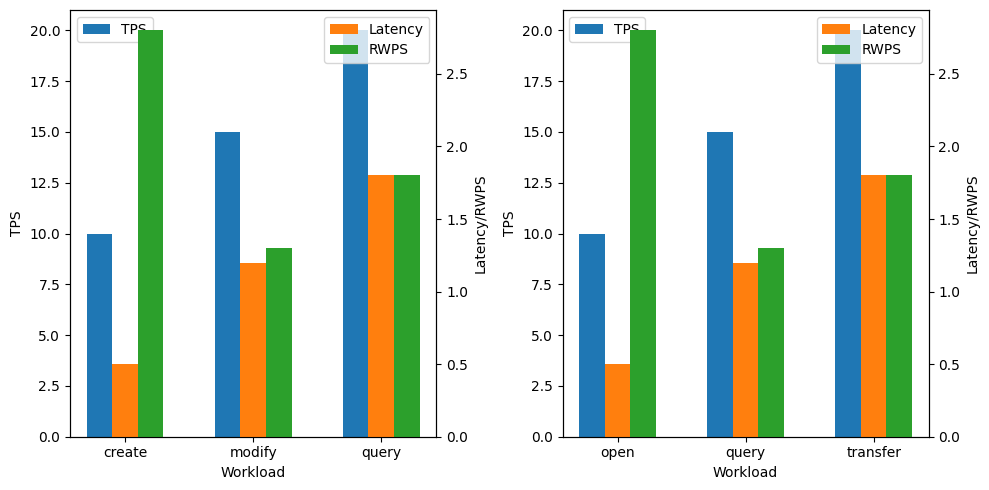

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# 枚举 abc
categories1 = ['create', 'modify', 'query']
categories2 = ['open', 'query', 'transfer']
x = np.arange(len(categories1))  # 生成 x 轴坐标

# 模拟数据
xgboost = [10, 15, 20]  # XGBoost 数据
svr1 = [0.5, 1.2, 1.8]   # SVR1 数据
svr2 = [2.8, 1.3, 1.8]   # SVR2 数据

width = 0.2  # 柱状图宽度

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.bar(x - width, xgboost, width, label='TPS')
ax12 = ax1.twinx()
ax12.bar(x, svr1, width, label='Latency', color='#ff7f0e')
ax12.bar(x + width, svr2, width, label='RWPS', color='#2ca02c')
ax12.set_ylabel('Latency/RWPS')
ax1.set_xlabel('Workload')
ax1.set_ylabel('TPS')
ax1.set_xticks(x)
ax1.set_xticklabels(categories1)
ax1.legend()
ax12.legend()

ax2.bar(x - width, xgboost, width, label='TPS')
ax22 = ax2.twinx()
ax22.bar(x, svr1, width, label='Latency', color='#ff7f0e')
ax22.bar(x + width, svr2, width, label='RWPS', color='#2ca02c')
ax22.set_ylabel('Latency/RWPS')
ax2.set_xlabel('Workload')
ax2.set_ylabel('TPS')
ax2.set_xticks(x)
ax2.set_xticklabels(categories2)
ax2.legend()
ax22.legend()
plt.tight_layout()

plt.show()


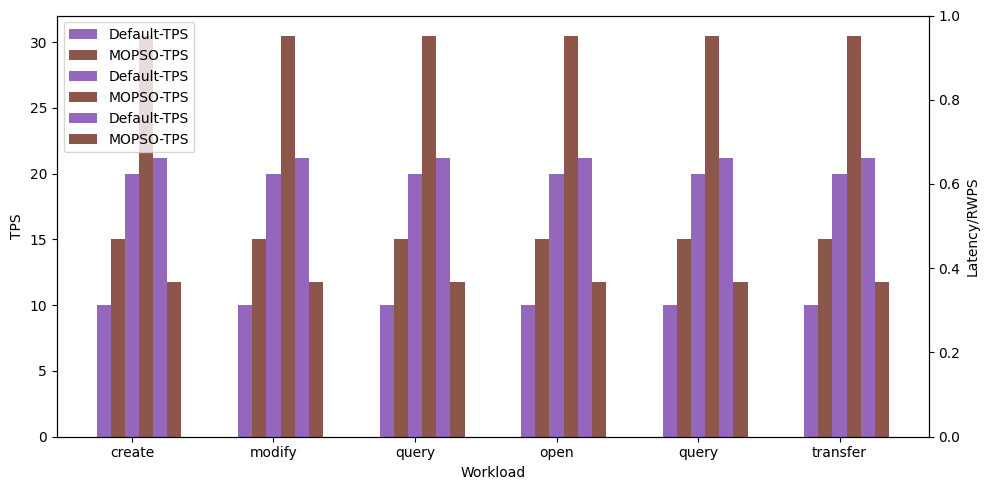

In [43]:
import matplotlib.pyplot as plt
import numpy as np

# 枚举 abc
categories = ['create', 'modify', 'query', 'open', 'query', 'transfer']
x = np.arange(len(categories))  # 生成 x 轴坐标

# 模拟数据
data = [
    (10, 0.5, 2.8, 'Default-TPS', 'Default-Latency', 'Default-RWPS', '#9467bd'),
    (15, 1.2, 1.3, 'MOPSO-TPS', 'MOPSO-Latency', 'MOPSO-RWPS', '#8c564b'),
    (20, 1.8, 1.8, 'Default-TPS', 'Default-Latency', 'Default-RWPS', '#9467bd'),
    (30.5, 0.5, 0.5, 'MOPSO-TPS', 'MOPSO-Latency', 'MOPSO-RWPS', '#8c564b'),
    (21.2, 1.2, 1.2, 'Default-TPS', 'Default-Latency', 'Default-RWPS', '#9467bd'),
    (11.8, 1.8, 1.8, 'MOPSO-TPS', 'MOPSO-Latency', 'MOPSO-RWPS', '#8c564b'),
]

width = 0.1  # 柱状图宽度

fig, ax1 = plt.subplots(1, 1, figsize=(10, 5))

plots = []
for i, (tps, latency, rwps, label_tps, label_latency, label_rwps, color) in enumerate(data):
    plots.extend([
        ax1.bar(x - 2*width + i*width, tps, width, label=label_tps, color=color),
        ax1.bar(x - width + i*width, latency, width, label=label_latency, color=color),
        ax1.bar(x + i*width, rwps, width, label=label_rwps, color=color),
    ])

ax2 = ax1.twinx()
ax2.set_ylabel('Latency/RWPS')
ax1.set_xlabel('Workload')
ax1.set_ylabel('TPS')
ax1.set_xticks(x)
ax1.set_xticklabels(categories)

# 合并图例
labels = [plot.get_label() for plot in plots]
ax1.legend(plots, labels, loc='upper left')

plt.tight_layout()
plt.show()


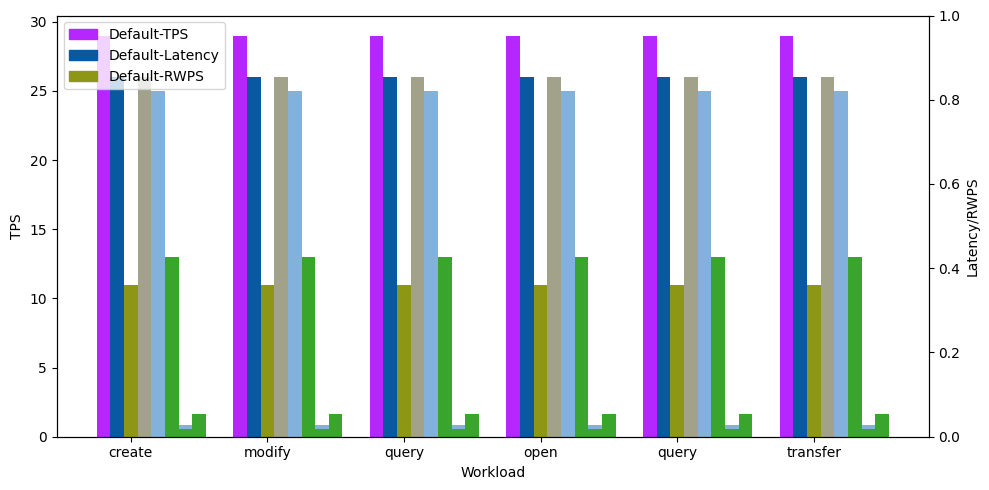

In [52]:
import matplotlib.pyplot as plt
import numpy as np

# 枚举 abc
categories = ['create', 'modify', 'query', 'open', 'query', 'transfer']
x = np.arange(len(categories))  # 生成 x 轴坐标

# 生成随机数据
  # 设置随机种子以确保结果可重复
data = [
    (np.random.randint(10, 30), np.random.uniform(0.5, 2.0), np.random.uniform(0.5, 2.8), np.random.rand(3)) for _ in range(6)
]

width = 0.1  # 柱状图宽度

fig, ax1 = plt.subplots(1, 1, figsize=(10, 5))

plots = []
for i, (tps, latency, rwps, color) in enumerate(data):
    plots.extend([
        ax1.bar(x - 2*width + i*width, tps, width, color=color),
        ax1.bar(x - width + i*width, latency, width, color=color),
        ax1.bar(x + i*width, rwps, width, color=color),
    ])

ax2 = ax1.twinx()
ax2.set_ylabel('Latency/RWPS')
ax1.set_xlabel('Workload')
ax1.set_ylabel('TPS')
ax1.set_xticks(x)
ax1.set_xticklabels(categories)

# 创建自定义图例
labels = ['Default-TPS', 'Default-Latency', 'Default-RWPS']
custom_legend = [plt.Rectangle((0, 0), 1, 1, color=data[i][3], label=labels[i % len(labels)]) for i in range(len(data))]
ax1.legend(custom_legend, labels, loc='upper left')

plt.tight_layout()
plt.show()
